This notebok is to perform a extreme-point-density analysis using the theory developed by Yongxiang HUANG et al.

PHYSICAL REVIEW E 96, 012215 (2017) Extremal-point density of scaling processes: From fractional Brownian motion to turbulence in one dimension.

The extremal point is defined as $x_{i-1}<x_i<x_{i+1}$ or vice verse. 

Considering a coarse grain of the time series $x(t)$ with a window size $\tau$, the extremal point then satisfies,
$$x[t-\tau]<x[t] \quad\& \quad x[t+1-\tau]>x[t+1]$$

In [169]:
%matplotlib inline
import numba

@numba.njit(fastmath=True)
def est_EPD_1d(x,Tau,Nx,NTau):
    EPD=np.full((Nx,NTau),False)
    for i in range(NTau):
        for j in range(1+Tau[i],Nx-Tau[i]-1):
            if ((x[j-Tau[i]]<x[j]) & (x[j+1-Tau[i]]>x[j+1])) |((x[j-Tau[i]]>x[j]) & (x[j+1-Tau[i]]<x[j+1])):
                    EPD[j,i]=True
    return EPD

print('Finish define function:',datetime.datetime.now().strftime('%Y-%m-%d %H:%M:%S'))

Finish define function: 2021-02-04 21:04:41


The Python version EPD code has been verified with the Matlab one. They provide the same results.

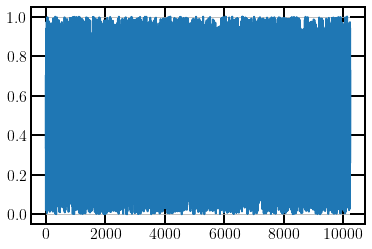

In [146]:
Nx=10240
x=np.random.random(Nx)
Nx=np.size(x)
plt.plot(x)

In [161]:
# t=np.arange(0,100,0.1)
# x=np.sin(t)
A=sio.loadmat('fbm.mat')
x=np.squeeze(A['x'])
rt=np.squeeze(A['rt'])
TT=np.squeeze(A['Tau'])
Nx=np.size(x)
Tau=np.arange(1,101)
# Tau=np.array([10])
NTau=np.size(Tau)

t0=time.time()
EPD=est_EPD(x,Tau,Nx,NTau)
t=time.time()-t0
print(t)

0.5686578750610352


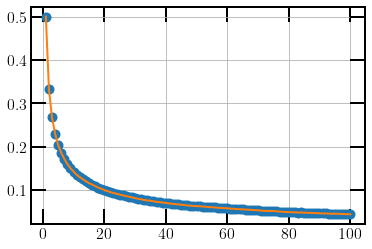

In [162]:
plt.plot(TT,rt,'o')
plt.plot(Tau,np.mean(EPD,axis=0)*Nx/(Nx-Tau),'-',mfc='none',ms=10)

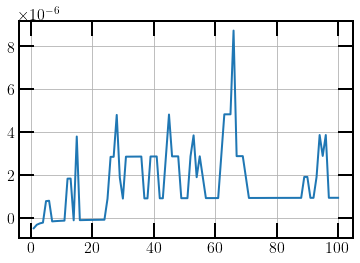

In [164]:
# plt.plot(TT,rt,'o')
plt.plot(Tau,rt-np.mean(EPD,axis=0)*Nx/(Nx-Tau),'-',mfc='none',ms=10)

In [131]:
dx=x[1:]-x[:-1]
dx=dx[1:]*dx[:-1]
Ind=np.where(dx<0)[0]
np.size(Ind)

682546

In [132]:
# %%timeit
k=0
Tau=1
for j in range(Tau,Nx-Tau):
    if ((x[j-Tau]<x[j]) & (x[j+1-Tau]>x[j+1])) |((x[j-Tau]>x[j]) & (x[j+1-Tau]<x[j+1])) :
        k+=1
print(k)

682546


In [122]:
j=100
print(x[j-Tau],x[j],x[j+1])
((x[j-Tau]<x[j]) & (x[j+1]<x[j])) |((x[j-1-Tau]>x[j]) & (x[j+1-Tau]>x[j]))

0.3070862562601431 -0.13694478229749224 -0.13694478229749224


False